In [2]:
# 회귀 모델: K-최근접 이웃 회귀, 선형 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# 훈련 데이터와 테스트 데이터 나눠주는 거, 그리드 서치 (하이퍼파라미터 튜닝)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# 창문해 때 지겹도록 썼던 matplotlib
import matplotlib.pyplot as plt

# numpy 배열, pandas, csv 리더
import numpy as np
import pandas as pd
import csv

In [3]:
# TODO: 여러분들에게 맞는 파일명, 인덱스로 바꾸세요.
filename = 'Training Data.csv' # 파일 이름

# csv 파일의 대략적인 내용을 출력해줍니다.
data = pd.read_csv(filename)
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
# 위 표를 보고 숫자를 넣어주세요.
idx1 = 10 # 독립변수
idx2 = 1 # 종속변수

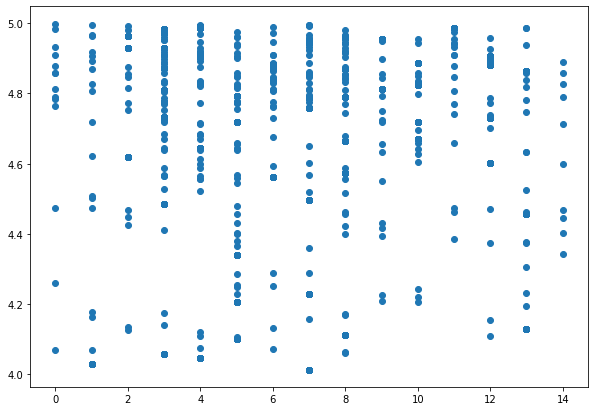

In [14]:
import math

# 데이터 읽어오기 -> 시각화
x_data = []
y_data = []

with open(filename, 'r') as f:
    rdr = csv.reader(f) # 사람에 따라 delimiter='\t' 추가해야 하는 경우 있음
    next(rdr) # 헤더 제거
    
    for line in rdr:
        try:
          y = math.log10(int(line[idx2]))
          if y > 5:
            continue
          y_data.append(y)
          x_data.append(int(line[idx1]))
        except:
          continue

plt.figure(figsize=(10,7))
plt.scatter(x_data, y_data)
plt.show()

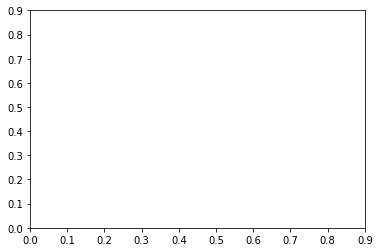

In [17]:
# 위 그래프를 보고, x값과 y값의 범위를 적절히 조절하여 비율이 1:1인 그래프를 만들어보세요.
# 1e6 = 1*10^6 = 1000000
# 1eN = 1*10^N = (0이 N개)

start = 0 # x값의 시작점
end = 0.9 # x값의 끝점

# x가 y보다 작을 때는 산점도가 나타나지 않습니다. 정상이에요.
plt.scatter(x_data, y_data)
plt.xlim((start, end))
plt.ylim((start, end))
plt.show()

## 키워드

특성: 데이터를 표현하는 성질feature (ex. 사람의 특성: 키, 몸무게, 혈액형, MBTI, ...)  
훈련: 머신러닝 알고리즘이 데이터에서 규칙을 찾는 과정 (사이킷런: fit() 메서드)  
모델: 알고리즘이 구현된 객체 (훈련시킨 결과)

훈련 세트와 데이터 세트의 분할  
샘플링 편향을 방지하기 위해 데이터를 잘 섞어주어야 함  
그렇지 않을 경우 엉뚱한 모델이 만들어질 위험이 있음  
  
## 훈련 세트와 데이터 세트의 분할

train_test_split(독립변수, 종속변수) -> 훈련입력, 테스트입력, 훈련타겟, 테스트타겟

In [21]:
x_data = np.array(x_data)
y_data = np.array(y_data)

# 회귀 분석 준비: 각 데이터를 넘파이 배열로 변환 및 세트 분리
train_input, test_input, train_target, test_target = train_test_split(
    x_data, y_data)

# 1d => 2d 변환
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [22]:
# n_param의 값을 조절해가며 점수를 확인하세요.
n_param = 20
knr = KNeighborsRegressor(n_neighbors=n_param)

# 인공지능 모델 학습: 출력결과는 학습 점수
# 여기서 오류가 뜰 경우, n_param의 작게(10~50) 값을 바꿔보세요.
knr.fit(train_input, train_target)
print(f'훈련 세트 정확도 : {knr.score(train_input, train_target)*100:.3f}%')
print(f'테스트 세트 정확도 : {knr.score(train_input, train_target)*100:.3f}%')

훈련 세트 정확도 : 17.409%
테스트 세트 정확도 : 17.409%


In [23]:
# K-최근접 이웃 회귀의 정확도를 높여볼까요?
for i in range(10, train_input.size, 30):
  knr = KNeighborsRegressor(n_neighbors=i)

  knr.fit(train_input, train_target)
  train_score = knr.score(train_input, train_target)
  test_score = knr.score(train_input, train_target)

  if train_score < 0 or test_score < 0:
    continue

  print(f'[i={i}] train, test: {train_score*100:.3f}%, {test_score*100:.3f}%')

print('=========================')
print(b'\xec\xa0\x80\xeb\x9f\xb0, \xec\x93\xb8\xeb\x8d\xb0\xec\x97\x86\xeb\x8a\x94 \xeb\x85\xb8\xea\xb0\x80\xeb\x8b\xa4\xeb\xa5\xbc \xed\x95\x98\xec\x85\xa8\xea\xb5\xb0\xec\x9a\x94!'
.decode('UTF-8'))

[i=10] train, test: 14.946%, 14.946%
[i=40] train, test: 20.499%, 20.499%
[i=70] train, test: 19.775%, 19.775%
[i=100] train, test: 18.841%, 18.841%
[i=130] train, test: 16.287%, 16.287%
[i=160] train, test: 14.782%, 14.782%
[i=190] train, test: 13.953%, 13.953%
[i=220] train, test: 12.403%, 12.403%
[i=250] train, test: 10.590%, 10.590%
[i=280] train, test: 8.394%, 8.394%
[i=310] train, test: 6.666%, 6.666%
[i=340] train, test: 5.985%, 5.985%
[i=370] train, test: 4.763%, 4.763%
[i=400] train, test: 4.478%, 4.478%
[i=430] train, test: 4.219%, 4.219%
[i=460] train, test: 3.848%, 3.848%
[i=490] train, test: 3.673%, 3.673%
[i=520] train, test: 3.746%, 3.746%
[i=550] train, test: 3.776%, 3.776%
[i=580] train, test: 3.483%, 3.483%
[i=610] train, test: 3.647%, 3.647%
[i=640] train, test: 3.519%, 3.519%
[i=670] train, test: 3.209%, 3.209%
[i=700] train, test: 2.994%, 2.994%
[i=730] train, test: 2.431%, 2.431%
[i=760] train, test: 2.650%, 2.650%
[i=790] train, test: 2.873%, 2.873%
[i=820] train

In [25]:
import warnings
warnings.simplefilter("ignore", UserWarning)

# 그리드 서치를 통해 최적의 매개변수를 찾아봅시다.
params = { 'n_neighbors' : range(5, train_input.size, 1) }
gs = GridSearchCV(KNeighborsRegressor(), params, n_jobs=-1)
gs.fit(train_input, train_target)
print(gs.best_params_) # 최상의 매개변수

{'n_neighbors': 44}


In [26]:
# n_param을 해당 값으로 바꿔줍시다.
n_param = 44
knr = KNeighborsRegressor(n_neighbors=n_param)
knr.fit(train_input, train_target)
print(f'훈련 세트 정확도 : {knr.score(train_input, train_target)*100:.3f}%')
print(f'테스트 세트 정확도 : {knr.score(test_input, test_target)*100:.3f}%')

훈련 세트 정확도 : 20.513%
테스트 세트 정확도 : 22.400%


예측값: [4.67368911]


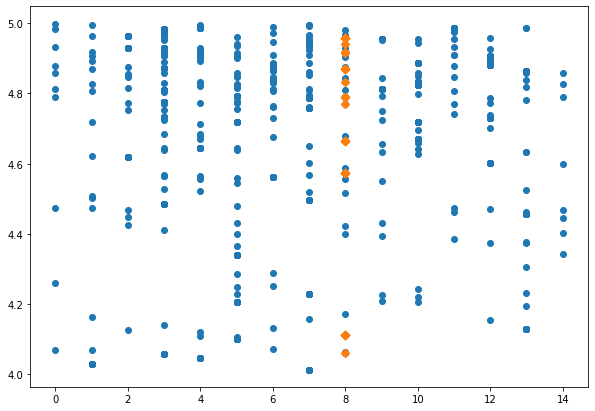

In [30]:
# 종속변수 추론하기
one = [[8]] # 독립변수 = x값
print(f'예측값: {knr.predict(one)}')
distances, indexes = knr.kneighbors(one)

plt.figure(figsize=(10,7))
plt.scatter(train_input, train_target)
# D
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
x = np.arange(start, end).reshape(-1, 1)
prediction = knr.predict(x)
plt.plot(x, prediction)
plt.show()

In [28]:
# 선형 회귀

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict(one))

[4.64619927]


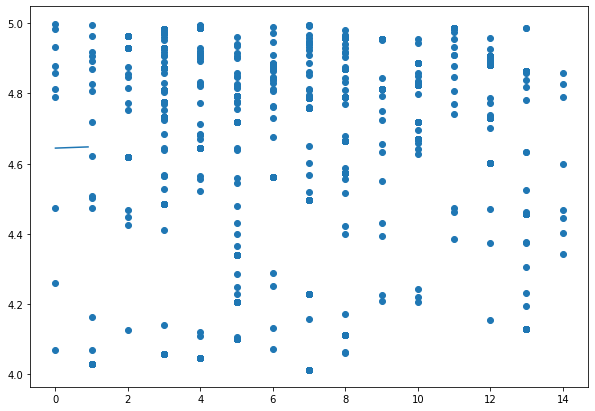

In [31]:
# coef_ = 가중치(w), intercept_ = 절편(b)
w = lr.coef_
b = lr.intercept_

plt.figure(figsize=(10,7))
plt.scatter(train_input, train_target)
plt.plot([start, end], [start * w +b, end * w + b])
plt.show()

In [38]:
# 비선형(다항) 회귀분석
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((train_input ** 2, test_input))

print(train_poly.shape)#, test_poly.shape)

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([8**2, 8]))

ValueError: ignored

IndexError: ignored

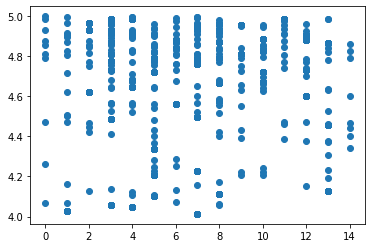

In [35]:

point = np.arange(start, end)
plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
plot.show()